# Logistic Regression
`Logistic Regression` is a classification algorithm that is used to assign observations to a `discrete set of classes`. It is a regression `linear classifier` meant for classification tasks. The objective of this algorithm is to find a line or a hyperplane that classifies the data points into two classes with the maximum margin. `Logistic Regression` is a `supervised learning` algorithm. It is a `regression linear classifier` that is used for `classification` tasks. In this algorithm, the dependent variable is a `binary categorical variable` with `only two possible values` (0/1, Yes/No, True/False etc.).\
Logistic Regression is used for:
* Binary Classification
* Multi-class Classification
* One-vs-Rest Classification

## Assumptions of Logistic Regression
1. The dependent variable must be categorical in nature.
2. The independent variables must be independent.
3. There must not be any outliers in data.

In [13]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score, confusion_matrix, classification_report

In [14]:
# load titanic data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
# pre process the data
df.drop(['deck'], axis=1, inplace=True)
# impute missing values in age
df['age'].fillna(df['age'].median(), inplace=True)
# impute missing values in embarked and embark_town
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# encode the categorical variables using for loop on object and category datatypes
label = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = label.fit_transform(df[col])
df.head()


C:\Users\sufwa\AppData\Local\Temp\ipykernel_22996\3819339207.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\sufwa\AppData\Local\Temp\ipykernel_22996\3819339207.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [16]:
# X and y
X = df.drop('survived', axis=1)
y = df['survived']

In [17]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
# call model
model = LogisticRegression()

In [19]:
# train the model
model.fit(X_train, y_train)

c:\ProgramData\miniconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# predict the values
y_pred = model.predict(X_test)

In [21]:
# evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Confusion Matrix: [[164   0]
 [  0 104]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       104

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



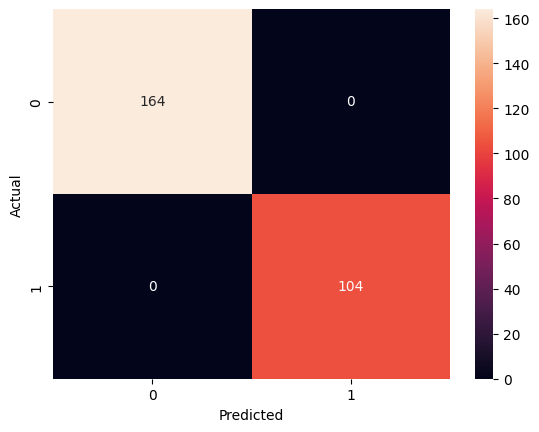

In [24]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
# save the model
import pickle
pickle.dump(model, open('./saved_models/logistic_regression.pkl', 'wb'))